In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from copy import deepcopy
from sklearn.metrics import roc_auc_score

/home/hania/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### The Netherlands

In [2]:
netherlands = pd.read_excel('../data/42256_2020_253_MOESM1_ESM.xlsx', engine = 'openpyxl')

df = netherlands[["LD", "CRP", "Percentage lymphocytes", "Survival/death"]]
df = df.assign(death = np.where(df["Survival/death"] == 'Alive', 0, 1))
netherlands = df
netherlands['from'] = 'netherlands'
netherlands = netherlands.rename(columns = { 'Percentage lymphocytes':'Lymphocytes', 'LD':'LDH'})
netherlands = netherlands[["LDH", "CRP", "Lymphocytes", "death", "from"]]

### China

In [3]:
import sys
sys.path.append("..")
china = pd.read_excel('../data/time_series_375_prerpocess_en.xlsx', engine = 'openpyxl')

from raport_v1.utils_features_selection import data_read_and_split
X_data_all_features, Y_data, x_col = data_read_and_split()
cheng = {'乳酸脱氢酶':'LDH', '超敏C反应蛋白':'CRP', '淋巴细胞(%)':'Lymphocytes'}
blood_df = X_data_all_features[list(cheng.keys())]
blood_df.columns = list(cheng.values())
china = blood_df
china['death'] = Y_data
china['from'] = 'china'
china = china.reset_index(drop = True)

### NY

In [7]:
ny = pd.read_csv('~/Downloads/Yan_reply_First_last_wtime.csv')
#ny = pd.read_csv('../data/Yan_reply_First_last_wtime.csv')
y_ny = ny.iloc[:,1]
newyork = ny.iloc[:,[5,6,7]]
newyork['death'] = y_ny
newyork['from'] = 'newyork'
newyork.columns = ['LDH', 'CRP', 'Lymphocytes', 'death', 'from']

## Combining together

In [8]:
nations = china.append([newyork, netherlands])
nations['death'] = nations.death.astype('int')
nations = nations.reset_index(drop=True)
# nations.to_csv("all.csv")

In [9]:
nations.head(3)

,LDH,CRP,Lymphocytes,death,from
0,206.00,2.60,25.90,0,china
1,282.00,27.40,9.20,0,china
2,226.00,3.60,27.30,0,china


### Lazypredict without country of origin

In [23]:
# nations = pd.read_csv('all.csv')
X = nations[['LDH','CRP','Lymphocytes']]
X_train, X_test, y_train, y_test = train_test_split(X, nations.death, test_size = 0.25, random_state = 42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models.to_csv("LazyClassifier_results.csv", float_format='%.3f')

#print(models)

100%|██████████| 29/29 [00:03<00:00,  8.28it/s]


In [24]:
models.sort_values("ROC AUC", ascending = False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.74,0.70,0.70,0.73,0.26
AdaBoostClassifier,0.74,0.69,0.69,0.73,0.19
NearestCentroid,0.69,0.69,0.69,0.70,0.02
KNeighborsClassifier,0.72,0.68,0.68,0.72,0.04
LabelPropagation,0.71,0.67,0.67,0.71,0.20
RandomForestClassifier,0.72,0.67,0.67,0.71,0.33
NuSVC,0.71,0.67,0.67,0.71,0.18
LogisticRegression,0.73,0.67,0.67,0.71,0.03
LabelSpreading,0.71,0.66,0.66,0.70,0.26


### Lazypredict with country of origin

In [71]:
# nations = pd.read_csv('all.csv')
X = nations[['LDH','CRP','Lymphocytes', "from"]]
X_train, X_test, y_train, y_test = train_test_split(X, nations.death, test_size = 0.25, random_state = 42)

clf_2 = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state=6)
models_2,predictions_2 = clf_2.fit(X_train, X_test, y_train, y_test)
models_2.sort_values("ROC AUC", ascending = False)
models_2.to_csv("LazyClassifier_results_nations.csv", float_format='%.3f')

100%|██████████| 29/29 [00:03<00:00,  9.59it/s]


In [72]:
models_2.sort_values("ROC AUC", ascending = False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.77,0.73,0.73,0.77,0.35
ExtraTreesClassifier,0.76,0.72,0.72,0.75,0.22
AdaBoostClassifier,0.76,0.71,0.71,0.75,0.15
GaussianNB,0.72,0.71,0.71,0.72,0.03
LabelPropagation,0.74,0.71,0.71,0.74,0.14
KNeighborsClassifier,0.74,0.70,0.70,0.74,0.04
LGBMClassifier,0.75,0.70,0.70,0.74,0.55
LogisticRegression,0.76,0.70,0.70,0.75,0.04
CalibratedClassifierCV,0.76,0.70,0.70,0.75,0.23


## DALEX

In [83]:
import dalex as dx
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [85]:
X = nations.drop("death", axis = 1)

In [90]:
from sklearn.ensemble import RandomForestClassifier
nations = nations.dropna()
X = nations.drop("death", axis = 1)
trees = RandomForestClassifier()
parameters = {'max_depth': [None,5,10,15,20,30,50,100], 'n_estimators':[10,20,50,100,150]}
one_hot_data = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(one_hot_data, nations.death, test_size = 0.25, random_state = 42)

In [91]:
clf = GridSearchCV(trees, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20, 30, 50, 100],
                         'n_estimators': [10, 20, 50, 100, 150]})

In [92]:
print(clf.best_params_)
best = clf.best_estimator_

{'max_depth': 5, 'n_estimators': 50}


In [93]:
exp = dx.Explainer(clf, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 430 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 430 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f812e761160> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00532, mean = 0.357, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.94, mean = -0.00105, max = 0.887
  -> model_info        : package sklearn

A new explainer has been created!


In [94]:
exp.model_performance()

,recall,precision,f1,accuracy,auc
GridSearchCV,0.54,0.75,0.63,0.77,0.83


In [108]:
roc_auc_score(y_test,clf.predict(X_test))

0.7225053679714966

In [95]:
exp.model_parts().plot()

In [109]:
exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 6/6 [00:00<00:00, 10.38it/s]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


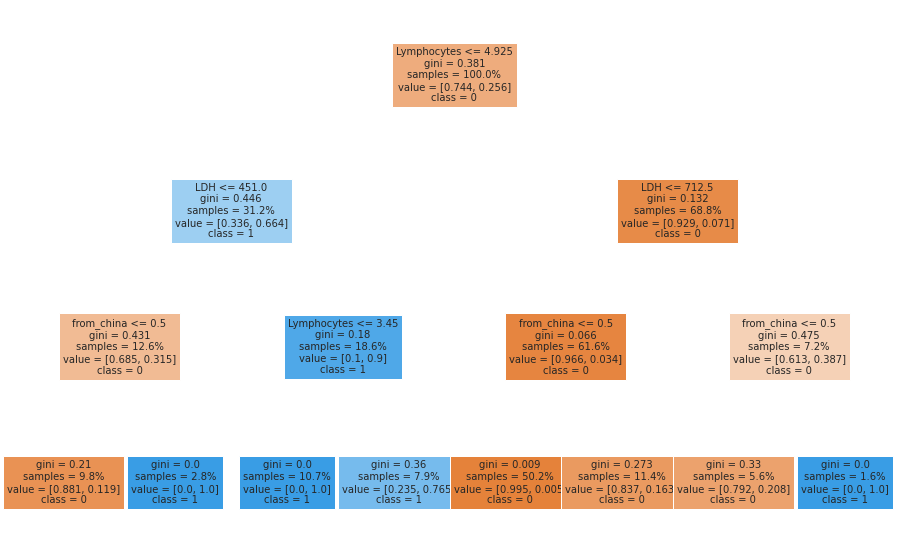

In [110]:
sur = exp.model_surrogate(max_vars=4, max_depth=3)
sur.plot()

### Grid Search - top 3 klasyfikatory 

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

In [28]:
ada_boost = AdaBoostClassifier()
params = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
}
ada_grid = GridSearchCV(ada_boost, params)
ada_grid.fit(one_hot_data, nations.death)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

In [29]:
def show_top_3(grid):
    df = pd.DataFrame(grid.cv_results_)
    df = df.loc[:,['params', 'mean_test_score']]
    grid_search_results = df.sort_values('mean_test_score', ascending=False) \
                        .reset_index(drop=True)
    return grid_search_results.iloc[:3, :]

show_top_3(ada_grid)

,params,mean_test_score
0,"{'algorithm': 'SAMME', 'learning_rate': 0.05}",0.75
1,"{'algorithm': 'SAMME', 'learning_rate': 0.5}",0.66
2,"{'algorithm': 'SAMME', 'learning_rate': 0.3}",0.65


In [30]:
nc = NearestCentroid()

params = {
    'metric': ['euclidean', 'l1', 'l2']
}
nc_grid = GridSearchCV(nc, params)
nc_grid.fit(one_hot_data, nations.death)

show_top_3(nc_grid)

,params,mean_test_score
0,{'metric': 'euclidean'},0.69
1,{'metric': 'l2'},0.69
2,{'metric': 'l1'},0.69


In [31]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors': [3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

knn_grid = GridSearchCV(knn, params)
knn_grid.fit(one_hot_data, nations.death)

show_top_3(knn_grid)

,params,mean_test_score
0,"{'algorithm': 'brute', 'n_neighbors': 6, 'p': ...",0.69
1,"{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1...",0.69
2,"{'algorithm': 'kd_tree', 'n_neighbors': 6, 'p'...",0.69


In [32]:
explainer_1 = dx.Explainer(ada_grid, one_hot_data, nations['death'])
explainer_1.model_performance()

Preparation of a new explainer is initiated

  -> data              : 1718 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1718 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001AEA4C84790> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.269, mean = 0.402, max = 0.558
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.558, mean = -0.0556, max = 0.731
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
GridSearchCV,0.43,0.68,0.53,0.73,0.80


In [33]:
explainer_2 = dx.Explainer(nc_grid, one_hot_data, nations['death'])
explainer_2.model_performance()

Preparation of a new explainer is initiated

  -> data              : 1718 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1718 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000001AEA4C84670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.359, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.0122, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
GridSearchCV,0.58,0.56,0.57,0.70,0.66


In [34]:
explainer_3 = dx.Explainer(knn_grid, one_hot_data, nations['death'])
explainer_3.model_performance()

Preparation of a new explainer is initiated

  -> data              : 1718 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1718 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001AEA4C84790> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.338, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.833, mean = 0.00795, max = 0.833
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
GridSearchCV,0.72,0.65,0.68,0.77,0.84
